<a href="https://colab.research.google.com/github/1724prachiti/ousums/blob/main/JhJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!nvidia-smi

Mon Jun 17 13:34:27 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print("HOME:", HOME)

HOME: /content


In [3]:
!pip install -q 'git+https://github.com/facebookresearch/segment-anything.git'

  Preparing metadata (setup.py) ... done


In [4]:
!pip install -q jupyter_bbox_widget roboflow dataclasses-json supervision


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 367.8/367.8 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.0/124.0 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.8 MB/s eta 0:00:00
Reason for being yanked: deprecated, use 4.8.0.76


In [5]:
!mkdir -p {HOME}/weights
!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth -P {HOME}/weights

In [6]:
import os

CHECKPOINT_PATH = os.path.join(HOME, "weights", "sam_vit_h_4b8939.pth")
print(CHECKPOINT_PATH, "; exist:", os.path.isfile(CHECKPOINT_PATH))

/content/weights/sam_vit_h_4b8939.pth ; exist: True


In [7]:
!mkdir -p {HOME}/data

!wget -q https://media.roboflow.com/notebooks/examples/dog.jpeg -P {HOME}/data
!wget -q https://media.roboflow.com/notebooks/examples/dog-2.jpeg -P {HOME}/data
!wget -q https://media.roboflow.com/notebooks/examples/dog-3.jpeg -P {HOME}/data
!wget -q https://media.roboflow.com/notebooks/examples/dog-4.jpeg -P {HOME}/data

In [8]:
import torch

DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
MODEL_TYPE = "vit_h"

In [9]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH).to(device=DEVICE)

In [10]:
mask_predictor = SamPredictor(sam)

In [11]:
import os

IMAGE_NAME = "/content/6_copy.jpg"
IMAGE_PATH = os.path.join(HOME, "data", IMAGE_NAME)
print(type(IMAGE_PATH))

<class 'str'>


In [12]:
import os

IMAGE_NAME = "/content/6_copy.jpg"
IMAGE_PATH = os.path.join(HOME, "data", IMAGE_NAME)

In [13]:
# helper function that loads an image before adding it to the widget

import base64

def encode_image(filepath):
    with open(filepath, 'rb') as f:
        image_bytes = f.read()
    encoded = str(base64.b64encode(image_bytes), 'utf-8')
    return "data:image/jpg;base64,"+encoded

In [ ]:
!pip install jupyter_bbox_widget

In [ ]:
IS_COLAB = True

if IS_COLAB:
    from google.colab import output
    output.enable_custom_widget_manager()

from jupyter_bbox_widget import BBoxWidget

widget = BBoxWidget()
widget.image = encode_image(IMAGE_PATH)
widget

BBoxWidget(colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#b…

In [14]:
mask_generator = SamAutomaticMaskGenerator(sam, points_per_batch=16)

In [ ]:
widget.bboxes

NameError: name 'widget' is not defined

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Load the image
image = cv2.imread('/content/6.jpg')

# Display the image
cv2_imshow(image)

AttributeError: 'NoneType' object has no attribute 'clip'

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Load the image
image = cv2.imread('/content/tri_cartisiancopy.png')

# Display the image
cv2_imshow(image)

AttributeError: 'NoneType' object has no attribute 'clip'

The bounding box xywh
origin is
x,y=top left corner

So, the bounding box that we are getting is the
top right corner of the image


In [ ]:
# Check if the supervision module is installed.
!pip install supervision

# Add the directory containing the supervision module to the Python

In [15]:
#new
import cv2
import supervision as sv

image_bgr = cv2.imread(IMAGE_PATH)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

sam_result = mask_generator.generate(image_rgb)

In [28]:
xywh=sam_result[0]['bbox']
print(xywh)

[203, 275, 741, 741]


In [25]:


def left_edge(xywh):
    x1, y1, w, h = xywh
    height = h + 1
    left = []

    for i in range(height):
        left.append((x1, y1 + i))

    return left


def top_edge(xywh):
    x1, y1, w, h = xywh
    width = w + 1
    top = []

    for i in range(width):
        top.append((x1 + i, y1))

    return top

def right_edge(xywh):
    x1, y1, w, h = xywh
    height = h+1
    right = []

    for i in range(height):
        right.append((x1+w, y1 + i))

    return right


def bottom_edge(xywh):
    x1, y1, w, h = xywh
    width = h+1
    bottom = []

    for i in range(width):
        bottom.append((x1+i, y1 + h))

    return bottom

3


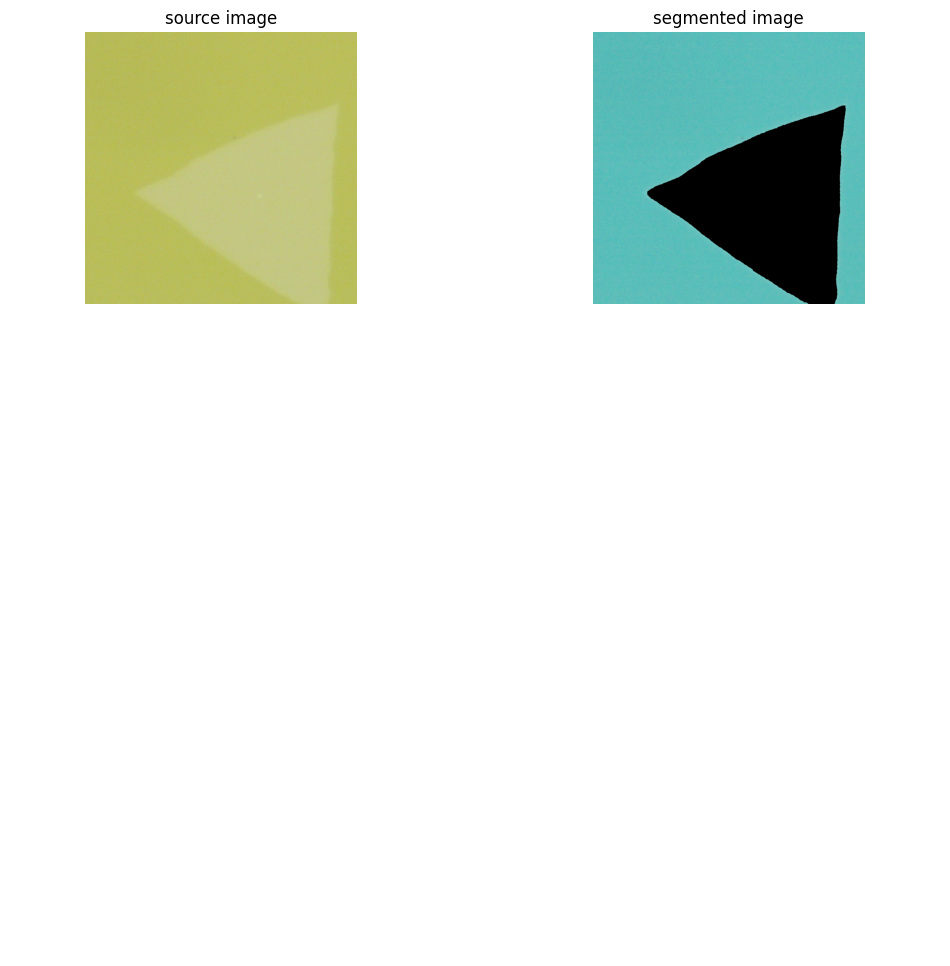

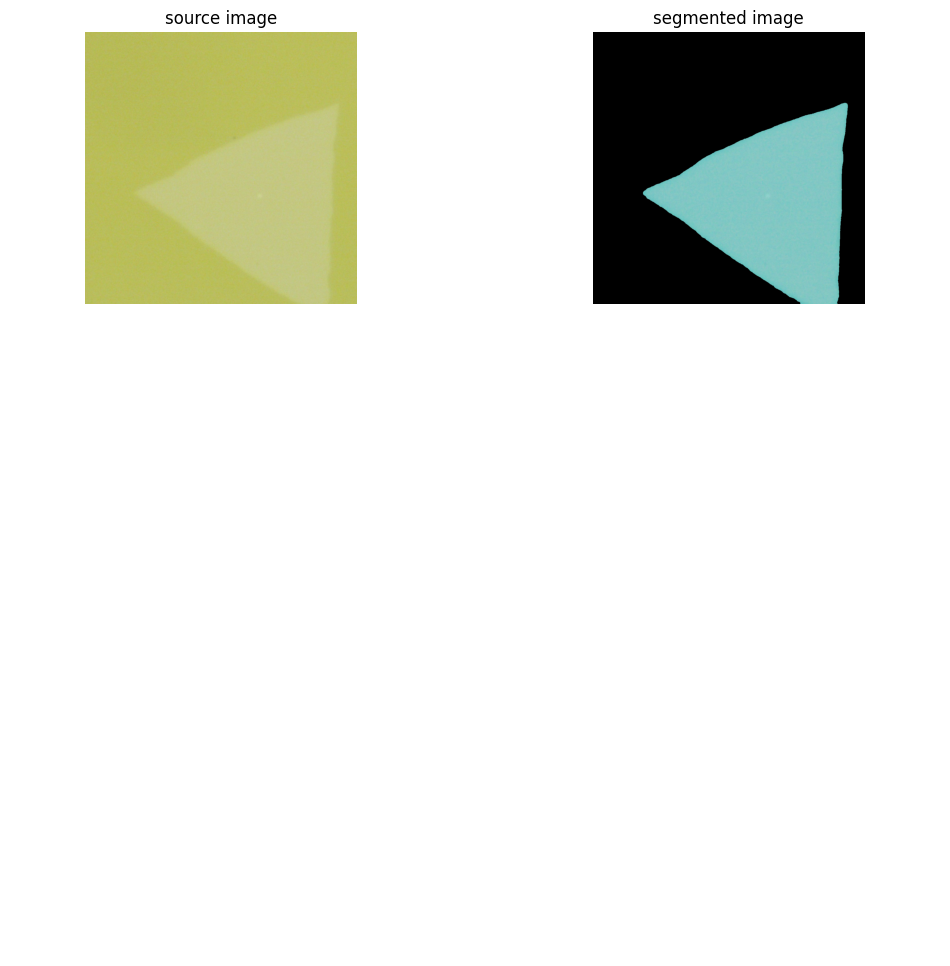

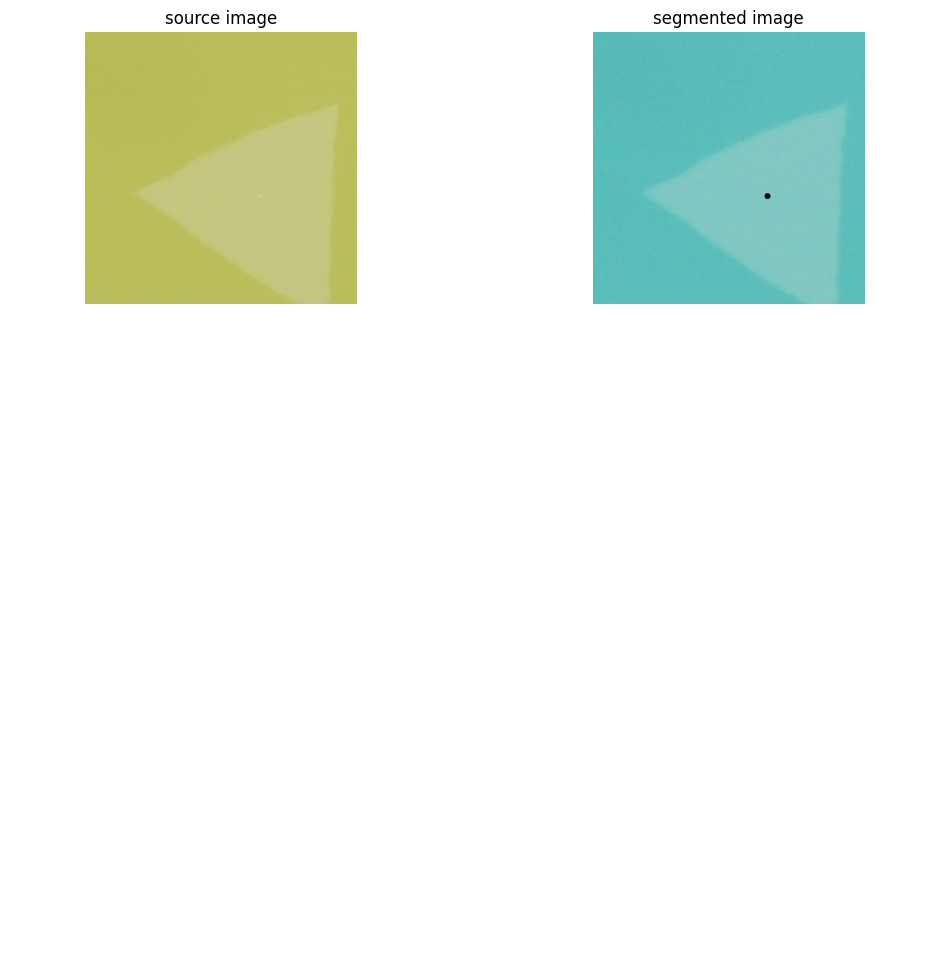

In [27]:

print(len(sam_result))
maskk = []
for i in range(len(sam_result)):
    maskk.append(sam_result[i]["segmentation"])
    temp = image_rgb.copy()
    temp[maskk[i]] = 0.0

    sv.plot_images_grid(
    images=[image_bgr, temp],
    grid_size=(len(sam_result), 2),
    titles=['source image', 'segmented image']
    )


In [30]:
from PIL import Image

# Path to your image file
image_path = '/content/6_copy.jpg'

with Image.open(image_path) as img:
    # Get the resolution (width and height)
    W, H = img.size

# Print the resolution
print(f"The resolution of the image is {W}x{H} pixels.")


The resolution of the image is 1017x1017 pixels.


In [32]:
l=left_edge(xywh)

In [39]:
print(left_edge(xywh))

[(203, 275), (203, 276), (203, 277), (203, 278), (203, 279), (203, 280), (203, 281), (203, 282), (203, 283), (203, 284), (203, 285), (203, 286), (203, 287), (203, 288), (203, 289), (203, 290), (203, 291), (203, 292), (203, 293), (203, 294), (203, 295), (203, 296), (203, 297), (203, 298), (203, 299), (203, 300), (203, 301), (203, 302), (203, 303), (203, 304), (203, 305), (203, 306), (203, 307), (203, 308), (203, 309), (203, 310), (203, 311), (203, 312), (203, 313), (203, 314), (203, 315), (203, 316), (203, 317), (203, 318), (203, 319), (203, 320), (203, 321), (203, 322), (203, 323), (203, 324), (203, 325), (203, 326), (203, 327), (203, 328), (203, 329), (203, 330), (203, 331), (203, 332), (203, 333), (203, 334), (203, 335), (203, 336), (203, 337), (203, 338), (203, 339), (203, 340), (203, 341), (203, 342), (203, 343), (203, 344), (203, 345), (203, 346), (203, 347), (203, 348), (203, 349), (203, 350), (203, 351), (203, 352), (203, 353), (203, 354), (203, 355), (203, 356), (203, 357), (20

In [54]:
ccle=[]

ccle=[(x,H-y) for (x,y) in left_edge(xywh)]
print(ccle)
print(len(ccle))
print(left_edge(xywh))
print(ccle[0])
print(ccle[741])



[(203, 742), (203, 741), (203, 740), (203, 739), (203, 738), (203, 737), (203, 736), (203, 735), (203, 734), (203, 733), (203, 732), (203, 731), (203, 730), (203, 729), (203, 728), (203, 727), (203, 726), (203, 725), (203, 724), (203, 723), (203, 722), (203, 721), (203, 720), (203, 719), (203, 718), (203, 717), (203, 716), (203, 715), (203, 714), (203, 713), (203, 712), (203, 711), (203, 710), (203, 709), (203, 708), (203, 707), (203, 706), (203, 705), (203, 704), (203, 703), (203, 702), (203, 701), (203, 700), (203, 699), (203, 698), (203, 697), (203, 696), (203, 695), (203, 694), (203, 693), (203, 692), (203, 691), (203, 690), (203, 689), (203, 688), (203, 687), (203, 686), (203, 685), (203, 684), (203, 683), (203, 682), (203, 681), (203, 680), (203, 679), (203, 678), (203, 677), (203, 676), (203, 675), (203, 674), (203, 673), (203, 672), (203, 671), (203, 670), (203, 669), (203, 668), (203, 667), (203, 666), (203, 665), (203, 664), (203, 663), (203, 662), (203, 661), (203, 660), (20

In [65]:
mc= np.nonzero(sam_result[0]['segmentation'])

x=mc[1]
y=mc[0]
min_y=y.max()
max_y=y.min()
min_x=x.min()

idminy = np.where(y == min_y)

idmaxy = np.where(y == max_y)

idminx = np.where(x == min_x)

#idminx = np.where(x == min_x)
#print(idminx)
xofminy = x[idminy]
yofminx=y[idminx]

#yofminx = y[idminx]
#print(yofminx)
xofmaxy = x[idmaxy]
print(min_x)
#print(yofminx)
print(H-yofminx)
print(min_y)
print(H-min_y)
print(xofminy)
print(H-max_y)
print(xofmaxy)

203
[420 419 418 417 416 415 414 413 412 411 410]
1016
1
[805 806 807 808 809 810 811 812 813 814 815 816 817 818 819 820 821 822
 823 824 825 826 827 828 829 830 831 832 833 834 835 836 837 838 839 840
 841 842 843 844 845 846 847 848 849 850 851 852 853 854 855 856 857 858
 859 860 861 862 863 864 865 866 867 868 869 870 871 872 873 874 875 876
 877 878 879 880 881 882 883 884 885 886 887 888 889 890 891 892 893 894
 895 896 897 898 899 900 901 902 903]
742
[931 932 933 934 935 936 937 938 939 940 941 942 943]


In [ ]:
mc= np.nonzero(sam_result[0]['segmentation'])

x=mc[1]
y=mc[0]
min_y=y.max()
max_y=y.min()
max_x=x.max()

idminy = np.where(y == min_y)

idmaxy = np.where(y == max_y)

#idminx = np.where(x == min_x)
#print(idminx)
xofminy = x[idminy]


#yofminx = y[idminx]
#print(yofminx)
xofmaxy = x[idmaxy]

In [22]:
maskk = []#maskk contains bbox coordinates of all triangles where x, y are the coordinates of the top left coordinate and in the inverted cartesian sys
values_list=[]#values_list contains the list of all values of width of triabgles
values_list1=[]#height
for i in range(len(sam_result)):
  maskk.append(sam_result[i]['bbox'])
  values_list.append(maskk[i][2])
  values_list1.append(maskk[i][3])



import numpy as np
#0

values_list = list(set(values_list))
values_list1 = list(set(values_list1))
values_list = np.sort(values_list)
values_list1 = np.sort(values_list1)


# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = np.percentile(values_list, 25)
Q3 = np.percentile(values_list, 75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the bounds for outliers

# Initialize two lists to hold the separated values
large_values = []
other_values = []

# Iterate through each value in the list
for value in values_list:
    if value < Q1 or value > Q3:
        large_values.append(value)
    else:
        other_values.append(value)

# Print the results


print('no. of triangles are triangles:'+str(len(other_values)))
#1



# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = np.percentile(values_list1, 25)
Q3 = np.percentile(values_list1, 75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the bounds for outliers

# Initialize two lists to hold the separated values
large_values1 = []
other_values1 = []

# Iterate through each value in the list
for value in values_list1:
    if value < Q1 or value > Q3:
        large_values1.append(value)
    else:
        other_values1.append(value)

# Print the results


print('no. of triangles are triangles:'+str(len(other_values1)))
print(other_values)#THEMID VALUES OF WIDTH
print(other_values1)#TH HEIGHT


no. of triangles are triangles:1
no. of triangles are triangles:1
[741]
[741]


In [23]:
index=[]
index1=[]
findex=[]
for i in range(len(values_list)):
  if values_list[i] in other_values:
    index.append(i)
for i in range(len(values_list1)):
  if values_list1[i] in other_values1:
    index1.append(i)
print(index)
print(index1)

for i in index:
  if i in index1:
    findex.append(i)
print(findex)#THE FINAL INDEICES OF THE BOUNDING BOX WHICH SATISFY THE THRESHOLD VALUES


[1]
[1]
[1]


3


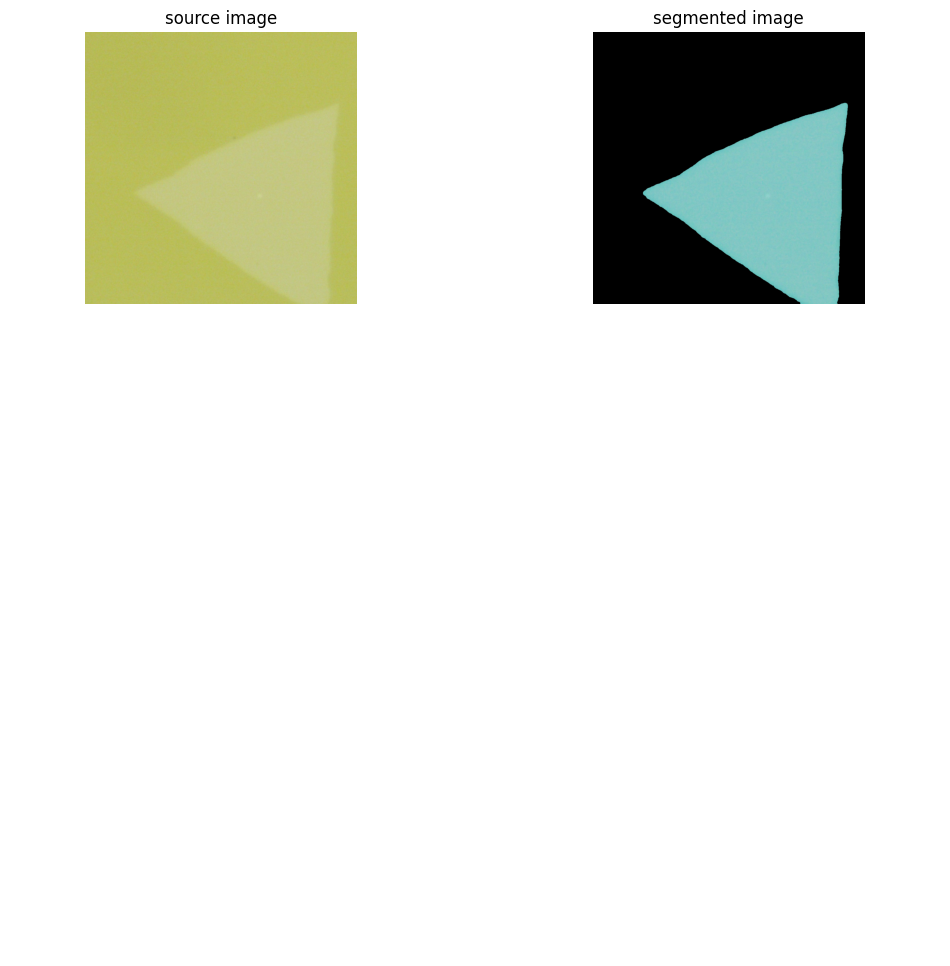

In [24]:
print(len(sam_result))
seg=[]
for i in findex:
    seg.append(sam_result[i]["segmentation"]) #SEG IS THE LIST OF SEGMETATION ARRAY
for i in range(len(seg)):
    temp = image_rgb.copy()
    temp[seg[i]] = 0.0

    sv.plot_images_grid(
    images=[image_bgr, temp],
    grid_size=(len(sam_result), 2),
    titles=['source image', 'segmented image']
    )


In [ ]:
print(sam_result[0]['bbox'])

[0, 7, 3299, 2155]


The xywh format for a bounding box stands for the following:

x: The x-coordinate of the top-left corner of the bounding box.
y: The y-coordinate of the top-left corner of the bounding box.
w: The width of the bounding box.
h: The height of the bounding box.

In [ ]:
seg

In [ ]:
bb = sam_result[4]['bbox']
def coordinateofbbox(bb):
  x = bb[0]
  y = bb[1]
  w = bb[2]
  h = bb[3]
  return x,y,w,h
coordinateofbbox(bb)



(880, 1029, 381, 477)

In [ ]:
xywh= sam_result[0]['bbox']
import numpy as np

def left_edge(xywh):
    x1, y1, w, h = xywh
    height = h + 1
    left = []

    for i in range(height):
        left.append((x1, y1 + i))

    return left

def top_edge(xywh):
    x1, y1, w, h = xywh
    width = w + 1
    top = np.zeros((1, width), dtype=object)
    for i in range(width):
        top[0, i] = (x1 + i, y1)
    return top

def right_edge(xywh):
    x1, y1, w, h = xywh
    height = h + 1
    right = np.zeros((height, 1), dtype=object)
    for i in range(height):
        right[i, 0] = (x1 + w, y1 + i)
    return right

def bottom_edge(xywh):
    x1, y1, w, h = xywh
    width = w + 1
    bottom = np.zeros((1, width), dtype=object)
    for i in range(width):
        bottom[0, i] = (x1 + i, y1 + h)
    return bottom

In [ ]:
def create_2d_array_with_pairs(x, y):
    # Check if x and y have the same length
    if len(x) != len(y):
        raise ValueError("x and y must have the same length")

    # Create a list of pairs
    array_2d = [(x[i], y[i]) for i in range(len(x))]
    return array_2d


In [ ]:
def create_2d_array_with_pairs(x, y):
    # Check if x and y have the same length
    if len(x) != len(y):
        raise ValueError("x and y must have the same length")

    # Create a list of pairs
    array_2d = [(x, y) for i in range(len(x))]
    return array_2d


In [ ]:

def find_intersection(list1, list2):
    # Convert lists to sets
    set1 = set(map(tuple, list1))
    set2 = set(map(tuple, list2))

    # Find the intersection of sets
    intersection = set1.intersection(set2)

    # Convert the intersection set back to a list
    vertices = list(intersection)

    return vertices


# Example arrays
#array1 = rect_coord
#array2 = tri_coord

# Find the intersection
#vertices = find_intersection(array1, array2)


In [ ]:

tricoord=[]
sc= np.nonzero(sam_result[1]["segmentation"])
print(sc)
x=sc[1]
y=sc[0]
print(x)
print(y)
coordinates = list(zip(x, y))
print(coordinates)
le=left_edge(sam_result[1]["bbox"])

ccle=[(x, H - y) for (x,y) in le]
print(ccle)
print(len(ccle))
print(len(le))
print(find_intersection(ccle, coordinates))


(array([366, 366, 367, ..., 763, 763, 763]), array([ 832,  833,  829, ..., 1008, 1009, 1010]))
[366 366 367 ... 763 763 763]
[ 832  833  829 ... 1008 1009 1010]
[(366, 832), (366, 833), (367, 829), (367, 830), (367, 831), (367, 832), (367, 833), (367, 834), (367, 835), (368, 829), (368, 830), (368, 831), (368, 832), (368, 833), (368, 834), (368, 835), (368, 836), (368, 837), (369, 828), (369, 829), (369, 830), (369, 831), (369, 832), (369, 833), (369, 834), (369, 835), (369, 836), (369, 837), (369, 838), (369, 839), (370, 827), (370, 828), (370, 829), (370, 830), (370, 831), (370, 832), (370, 833), (370, 834), (370, 835), (370, 836), (370, 837), (370, 838), (370, 839), (370, 840), (371, 826), (371, 827), (371, 828), (371, 829), (371, 830), (371, 831), (371, 832), (371, 833), (371, 834), (371, 835), (371, 836), (371, 837), (371, 838), (371, 839), (371, 840), (371, 841), (371, 842), (372, 825), (372, 826), (372, 827), (372, 828), (372, 829), (372, 830), (372, 831), (372, 832), (372, 833)

In [ ]:

#finding resolution of an image

from PIL import Image

# Path to your image file
image_path = '/content/9.jpg'

with Image.open(image_path) as img:
    # Get the resolution (width and height)
    W, H = img.size

# Print the resolution
print(f"The resolution of the image is {W}x{H} pixels.")


The resolution of the image is 3300x2173 pixels.


In [ ]:
left_edge(maskk[2])

[(2725, 1843),
 (2725, 1844),
 (2725, 1845),
 (2725, 1846),
 (2725, 1847),
 (2725, 1848),
 (2725, 1849),
 (2725, 1850),
 (2725, 1851),
 (2725, 1852),
 (2725, 1853),
 (2725, 1854),
 (2725, 1855),
 (2725, 1856),
 (2725, 1857),
 (2725, 1858),
 (2725, 1859),
 (2725, 1860),
 (2725, 1861),
 (2725, 1862),
 (2725, 1863),
 (2725, 1864),
 (2725, 1865),
 (2725, 1866),
 (2725, 1867),
 (2725, 1868),
 (2725, 1869),
 (2725, 1870),
 (2725, 1871),
 (2725, 1872),
 (2725, 1873),
 (2725, 1874),
 (2725, 1875),
 (2725, 1876),
 (2725, 1877),
 (2725, 1878),
 (2725, 1879),
 (2725, 1880),
 (2725, 1881),
 (2725, 1882),
 (2725, 1883),
 (2725, 1884),
 (2725, 1885),
 (2725, 1886),
 (2725, 1887),
 (2725, 1888),
 (2725, 1889),
 (2725, 1890),
 (2725, 1891),
 (2725, 1892),
 (2725, 1893),
 (2725, 1894),
 (2725, 1895),
 (2725, 1896),
 (2725, 1897),
 (2725, 1898),
 (2725, 1899),
 (2725, 1900),
 (2725, 1901),
 (2725, 1902),
 (2725, 1903),
 (2725, 1904),
 (2725, 1905),
 (2725, 1906),
 (2725, 1907),
 (2725, 1908),
 (2725, 19

In [ ]:
#finding the coordiates of triangle
mc=[]
x=[]
y= []
tricoord=[]
ccle=[]
le=[]
re=[]
be=[]
te=[]
ccle= []
vert= []

for i in findex:
    le.append(left_edge(maskk[i]))
    re.append(right_edge(maskk[i]))
    be.append(bottom_edge(maskk[i]))
    te.append(top_edge(maskk[i]))
for i in range(len(seg)):
    mc.append(np.nonzero(seg[i])) #triangular coordinates which meet the threshold
    x.append(mc[i][1])#gives list containing array of the x coordinate of all the triangle
    y.append(mc[i][0])#gives list containing array of the y coordinate of all the triangle
    tricoord.append(create_2d_array_with_pairs(x[i],y[i])) #list contaning coordinates of triangles in the form of  2 d array
print(le)


for i in le:
    ccle.append([(x, H - y) for (x, y) in i])
print(ccle)
len(ccle)
len(mc)
'''
for j in range(len(mc)):#jth ccordinates of tri
    for i in mc[j]: #ith coordinate in jth tri
      if i in ccle[j]: #checking i is in ccle
            vert.append(i)
            #the len of mcshould be the same as len of ccle
    #j in mc will have the triangular coordinates of the jth triangle in mc list
'''
# Define the height of the Cartesian plane
print(vert)
for j in range(len(mc)):
    for (x_val, y_val) in zip(mc[j][1], mc[j][0]):  # Iterate over y and x coordinates in mc[j]
        if (x_val, y_val) in ccle[j]:  # Compare with adjusted coordinates in ccle[j]
            vert.append((x_val, y_val))

[[(880, 1029), (880, 1030), (880, 1031), (880, 1032), (880, 1033), (880, 1034), (880, 1035), (880, 1036), (880, 1037), (880, 1038), (880, 1039), (880, 1040), (880, 1041), (880, 1042), (880, 1043), (880, 1044), (880, 1045), (880, 1046), (880, 1047), (880, 1048), (880, 1049), (880, 1050), (880, 1051), (880, 1052), (880, 1053), (880, 1054), (880, 1055), (880, 1056), (880, 1057), (880, 1058), (880, 1059), (880, 1060), (880, 1061), (880, 1062), (880, 1063), (880, 1064), (880, 1065), (880, 1066), (880, 1067), (880, 1068), (880, 1069), (880, 1070), (880, 1071), (880, 1072), (880, 1073), (880, 1074), (880, 1075), (880, 1076), (880, 1077), (880, 1078), (880, 1079), (880, 1080), (880, 1081), (880, 1082), (880, 1083), (880, 1084), (880, 1085), (880, 1086), (880, 1087), (880, 1088), (880, 1089), (880, 1090), (880, 1091), (880, 1092), (880, 1093), (880, 1094), (880, 1095), (880, 1096), (880, 1097), (880, 1098), (880, 1099), (880, 1100), (880, 1101), (880, 1102), (880, 1103), (880, 1104), (880, 1105

In [ ]:
print(left_edge(bb))
print(top_edge(bb))
print(right_edge(bb))
print(bottom_edge(bb))

[(880, 1029), (880, 1030), (880, 1031), (880, 1032), (880, 1033), (880, 1034), (880, 1035), (880, 1036), (880, 1037), (880, 1038), (880, 1039), (880, 1040), (880, 1041), (880, 1042), (880, 1043), (880, 1044), (880, 1045), (880, 1046), (880, 1047), (880, 1048), (880, 1049), (880, 1050), (880, 1051), (880, 1052), (880, 1053), (880, 1054), (880, 1055), (880, 1056), (880, 1057), (880, 1058), (880, 1059), (880, 1060), (880, 1061), (880, 1062), (880, 1063), (880, 1064), (880, 1065), (880, 1066), (880, 1067), (880, 1068), (880, 1069), (880, 1070), (880, 1071), (880, 1072), (880, 1073), (880, 1074), (880, 1075), (880, 1076), (880, 1077), (880, 1078), (880, 1079), (880, 1080), (880, 1081), (880, 1082), (880, 1083), (880, 1084), (880, 1085), (880, 1086), (880, 1087), (880, 1088), (880, 1089), (880, 1090), (880, 1091), (880, 1092), (880, 1093), (880, 1094), (880, 1095), (880, 1096), (880, 1097), (880, 1098), (880, 1099), (880, 1100), (880, 1101), (880, 1102), (880, 1103), (880, 1104), (880, 1105)

NameError: name 'j' is not defined

In [ ]:
mc=[]
x=[]
y=[]
for i in range(len(seg)):
  mc.append(np.nonzero(seg[i]))
  x.append(mc[i][1])
  y.append(mc[i][0])
print(x)
print(y)
bb=[]
for i in findex:
  bb.append(maskk[i])
print(bb)
print(right_edge(bb[3]))



[array([3000, 3001, 3002, ..., 3004, 3005, 3006]), array([1492, 1493, 1490, ..., 1489, 1490, 1491]), array([1078, 1079, 1080, ..., 1110, 1107, 1108]), array([1612, 1608, 1609, ..., 1641, 1642, 1643]), array([3203, 3204, 3205, ..., 3245, 3246, 3247]), array([114, 115, 116, ..., 142, 143, 144]), array([2822, 2823, 2824, ..., 2897, 2898, 2899]), array([2262, 2263, 2264, ..., 2358, 2359, 2350]), array([753, 750, 751, ..., 793, 794, 795]), array([2111, 2112, 2113, ..., 2113, 2114, 2115]), array([2769, 2770, 2771, ..., 2778, 2779, 2780]), array([1679, 1680, 1677, ..., 1682, 1683, 1684]), array([1435, 1436, 1437, ..., 1496, 1497, 1498]), array([3422, 3423, 3407, ..., 3320, 3321, 3322])]
[array([ 764,  764,  764, ..., 1020, 1020, 1020]), array([2020, 2020, 2021, ..., 2273, 2273, 2273]), array([ 830,  830,  830, ..., 1060, 1061, 1061]), array([615, 616, 616, ..., 850, 850, 850]), array([2137, 2137, 2137, ..., 2336, 2336, 2336]), array([1102, 1102, 1102, ..., 1355, 1355, 1355]), array([1307, 130

In [ ]:
def create_2d_array_with_pairs(x, y):
    # Check if x and y have the same length
    if len(x) != len(y):
        raise ValueError("x and y must have the same length")

    # Create a list of pairs
    array_2d = [(x[i], y[i]) for i in range(len(x))]
    return array_2d

In [ ]:
import numpy as np
for i in range(len)

In [ ]:
import numpy as np


# Get the coordinates of the pixels that are part of the mask
for i in range(len(maskk)):
  mc.append(np.nonzero(maskk[i]))

# Print the coordinates
  #print(maskk[i])
  print(mc[i])


  tri_coord = create_2d_array_with_pairs(mc[1], mc[0])
  #print("coordinates of triangle:")
  #print(tri_coord)
  lftedgec = left_edge(xywh)
  print(lftedgec)

  print(type(tri_coord))
  vert1 = find_intersection(btmedgec, tri_coord)

  print('vertices of triangle are',vert1)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
(array([ 275,  275,  275, ..., 1016, 1016, 1016]), array([931, 932, 933, ..., 901, 902, 903]))
coordinates of triangle:


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[[(944, 275) (945, 275) (946, 275) ... (1683, 275) (1684, 275)
  (1685, 275)]
 [(944, 276) (945, 276) (946, 276) ... (1683, 276) (1684, 276)
  (1685, 276)]
 [(944, 277) (945, 277) (946, 277) ... (1683, 277) (1684, 277)
  (1685, 277)]
 ...
 [(944, 1014) (945, 1014) (946, 1014) ... (1683, 1014) (1684, 1014)
  (1685, 1014)]
 [(944, 1015) (945, 1015) (946, 1015) ... (1683, 1015) (1684, 1015)
  (1685, 1015)]
 [(944, 1016) (945, 1016) (946, 1016) ... (1683, 1016) (1684, 1016)
  (1685, 1016)]]
[[(203, 1016) (204, 1016) (205, 1016) (206, 1016) (207, 1016) (208, 1016)
  (209, 1016) (210, 1016) (211, 1016) (212, 1016) (213, 1016) (214, 1016)
  (215, 1016) (216, 1016) (217, 1016) (218, 1016) (219, 1016) (220, 1016)
  (221, 1016) (222, 1016) (223, 1016) (224, 1016) (225, 1016) (226, 1016)
  (227, 1016) (228, 1016) (229, 1016) (230, 1016) (231, 1016) (232, 1016)
  (233, 1016) (234, 1016) (235, 1016) (236, 1016) (237, 1016) (238, 1016)
  (239, 1016) (240, 1016) (241, 1016) (242, 1016) (243, 1016) (2

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



vertices of triangle are []
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
(array([603, 603, 603, 603, 603, 603, 603, 603, 603, 603, 604, 604, 604,
       604, 604, 604, 604, 604, 604, 604, 604, 604, 604, 605, 605, 605,
       605, 605, 605, 605, 605, 605, 605, 605, 605, 605, 605, 605, 605,
       606, 606, 606, 606, 606, 606, 606, 606, 606, 606, 606, 606, 606,
       606, 606, 606, 606, 607, 607, 607, 607, 607, 607, 607, 607, 607,
       607, 607, 607, 607, 607, 607, 607, 607, 607, 607, 608, 608, 608,
       608, 608, 608, 608, 608, 608, 608, 608, 608, 608, 608, 608, 608,
       608, 608, 608, 609, 609, 609, 609, 609, 609, 609, 609, 609, 609,
       609, 609, 609, 609, 609, 609, 609, 609, 609, 609, 609, 610, 610,
       610, 610, 610, 610, 610, 610, 610, 610, 610, 610, 61

In [ ]:
#new


In [ ]:
def create_2d_array_with_pairs(x, y):
    # Check if x and y have the same length
    if len(x) != len(y):
        raise ValueError("x and y must have the same length")

    # Create a list of pairs
    array_2d = [(x[i], y[i]) for i in range(len(x))]

    return array_2d


# Create the 2D array with pairs
tri_coord = create_2d_array_with_pairs(mc[1], mc[0])

print("coordinates of triangle:")
print(tri_coord)

coordinates of triangle:
[(647, 603), (648, 603), (649, 603), (650, 603), (651, 603), (652, 603), (653, 603), (654, 603), (655, 603), (656, 603), (646, 604), (647, 604), (648, 604), (649, 604), (650, 604), (651, 604), (652, 604), (653, 604), (654, 604), (655, 604), (656, 604), (657, 604), (658, 604), (644, 605), (645, 605), (646, 605), (647, 605), (648, 605), (649, 605), (650, 605), (651, 605), (652, 605), (653, 605), (654, 605), (655, 605), (656, 605), (657, 605), (658, 605), (659, 605), (644, 606), (645, 606), (646, 606), (647, 606), (648, 606), (649, 606), (650, 606), (651, 606), (652, 606), (653, 606), (654, 606), (655, 606), (656, 606), (657, 606), (658, 606), (659, 606), (660, 606), (643, 607), (644, 607), (645, 607), (646, 607), (647, 607), (648, 607), (649, 607), (650, 607), (651, 607), (652, 607), (653, 607), (654, 607), (655, 607), (656, 607), (657, 607), (658, 607), (659, 607), (660, 607), (661, 607), (643, 608), (644, 608), (645, 608), (646, 608), (647, 608), (648, 608), (6

In [ ]:
xyw= sam_result[0]['bbox']
def bottom_edge(xywh):
    # Unpack the coordinates
    x1, y1, w, h = xywh

    # Ensure coordinates are ordered correctly
    x2, y2 = x1 , y1+h
    x1, x2 = min(x1, x2), max(x1, x2)
    y1, y2 = min(y1, y2), max(y1, y2)

    # Determine the size of the array
    width = x2 - x1 + 1
    height = y2 - y1 + 1

    # Create the 2D array with zeros or any initial value
    array = np.zeros((height, width), dtype=object)

    # Fill the array with values (optional)
    for i in range(height):
        for j in range(width):
            array[i, j].append((x1 + j, y1 + i))  # Store coordinate tuple

    return array
print(bottom_edge(xywh))

[[(203, 275)]
 [(203, 276)]
 [(203, 277)]
 [(203, 278)]
 [(203, 279)]
 [(203, 280)]
 [(203, 281)]
 [(203, 282)]
 [(203, 283)]
 [(203, 284)]
 [(203, 285)]
 [(203, 286)]
 [(203, 287)]
 [(203, 288)]
 [(203, 289)]
 [(203, 290)]
 [(203, 291)]
 [(203, 292)]
 [(203, 293)]
 [(203, 294)]
 [(203, 295)]
 [(203, 296)]
 [(203, 297)]
 [(203, 298)]
 [(203, 299)]
 [(203, 300)]
 [(203, 301)]
 [(203, 302)]
 [(203, 303)]
 [(203, 304)]
 [(203, 305)]
 [(203, 306)]
 [(203, 307)]
 [(203, 308)]
 [(203, 309)]
 [(203, 310)]
 [(203, 311)]
 [(203, 312)]
 [(203, 313)]
 [(203, 314)]
 [(203, 315)]
 [(203, 316)]
 [(203, 317)]
 [(203, 318)]
 [(203, 319)]
 [(203, 320)]
 [(203, 321)]
 [(203, 322)]
 [(203, 323)]
 [(203, 324)]
 [(203, 325)]
 [(203, 326)]
 [(203, 327)]
 [(203, 328)]
 [(203, 329)]
 [(203, 330)]
 [(203, 331)]
 [(203, 332)]
 [(203, 333)]
 [(203, 334)]
 [(203, 335)]
 [(203, 336)]
 [(203, 337)]
 [(203, 338)]
 [(203, 339)]
 [(203, 340)]
 [(203, 341)]
 [(203, 342)]
 [(203, 343)]
 [(203, 344)]
 [(203, 345)]
 [(203

In [ ]:
import numpy as np
Ang=[ ]


def Angle(mc):
  x = mc[1]
  y = mc[0]
  min_y = y.min()

  max_y = y.max()

  idminy = np.where(y == min_y)

  idmaxy = np.where(y == max_y)

#idminx = np.where(x == min_x)
#print(idminx)
  xofminy = x[idminy]


#yofminx = y[idminx]
#print(yofminx)
  xofmaxy = x[idmaxy]

  xofminy= np.median(xofminy)
 # print('The point of minimum y is: ' + f'({xofminy},{min_y})')
  xofmaxy= np.median(xofmaxy)
#  print('The point of maximum y is: ' + f'({xofmaxy}, {max_y})')

  slope= np.abs((min_y-max_y)/(xofminy-xofmaxy))
  angle = np.arctan(slope)

  true_angle= np.rad2deg(angle)
  return true_angle
 # print(f'The angle of the leftmost edge of the triangle is {angle}rad and {true_angle}degrees')


# Get the coordinates of the pixels that are part of the mask
for i in range(len(maskk)):
  mask_coordinates = np.nonzero(maskk[i])

# Print the coordinates
 # print(mask_coordinates)
  Ang.append(Angle(mask_coordinates))
print(Ang)


[83.6088937714789, 86.08674905671273, 88.56790381583535]


In [ ]:


#triangle list
def create_2d_array_with_pairs(x, y):
    # Check if x and y have the same length
    if len(x) != len(y):
        raise ValueError("x and y must have the same length")

    # Create a list of pairs
    array_2d = [(x[i], y[i]) for i in range(len(x))]

    return array_2d


# Create the 2D array with pairs
tri_coord = create_2d_array_with_pairs(mc[0], mc[1])

print("coordinates of triangle:")
print(tri_coord)
#intersection of two arrays
import numpy as np


import numpy as np

def find_intersecting_coordinates(array1, array2):
    # Convert arrays to sets of tuples
    set1 = set(map(tuple, array1))
    set2 = set(map(tuple, array2))

    # Find the intersection of the two sets
    intersection = set1.intersection(set2)

    # Convert the intersection set back to a list of tuples
    intersection_list = list(intersection)

    return intersection_list

# Example 2D arrays with coordinate pairs
array1 = tri_coord
array2 = rect_coord

# Find the intersecting coordinates
intersecting_coordinates = find_intersecting_coordinates(array1, array2)

print("Intersecting Coordinates:")
print(intersecting_coordinates)



coordinates of triangle:
[(603, 647), (603, 648), (603, 649), (603, 650), (603, 651), (603, 652), (603, 653), (603, 654), (603, 655), (603, 656), (604, 646), (604, 647), (604, 648), (604, 649), (604, 650), (604, 651), (604, 652), (604, 653), (604, 654), (604, 655), (604, 656), (604, 657), (604, 658), (605, 644), (605, 645), (605, 646), (605, 647), (605, 648), (605, 649), (605, 650), (605, 651), (605, 652), (605, 653), (605, 654), (605, 655), (605, 656), (605, 657), (605, 658), (605, 659), (606, 644), (606, 645), (606, 646), (606, 647), (606, 648), (606, 649), (606, 650), (606, 651), (606, 652), (606, 653), (606, 654), (606, 655), (606, 656), (606, 657), (606, 658), (606, 659), (606, 660), (607, 643), (607, 644), (607, 645), (607, 646), (607, 647), (607, 648), (607, 649), (607, 650), (607, 651), (607, 652), (607, 653), (607, 654), (607, 655), (607, 656), (607, 657), (607, 658), (607, 659), (607, 660), (607, 661), (608, 643), (608, 644), (608, 645), (608, 646), (608, 647), (608, 648), (6

**PLAN FOR THE NEXT PART OF THIS CODE IS THE FOLLOWING**
1. Find the coordinates of all the points of a triangle.
How?
First let us find the coordinate of bounding box

2. Reduce the noise.
3.